In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("C:\\Users\\ONEEKA\\Downloads\\penguins_synthetic_wide.csv")

In [4]:
df.shape

(1500, 7)

In [5]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Gentoo,Biscoe,51.211594,10.784101,198,6536,female
1,Chinstrap,Dream,49.578723,30.000000,190,3280,male
2,Gentoo,Biscoe,54.473814,16.435158,208,4077,female
3,Adelie,Biscoe,44.907998,25.894140,204,3665,female
4,Adelie,Dream,26.304201,13.736113,160,8000,male


In [6]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

# Create new columns for encoded values
df['Species_n'] = LE.fit_transform(df['species'])

In [7]:
df.drop(axis=1,columns='species',inplace=True)

In [8]:
df

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Species_n
0,Biscoe,51.211594,10.784101,198,6536,female,2
1,Dream,49.578723,30.000000,190,3280,male,1
2,Biscoe,54.473814,16.435158,208,4077,female,2
3,Biscoe,44.907998,25.894140,204,3665,female,0
4,Dream,26.304201,13.736113,160,8000,male,0
...,...,...,...,...,...,...,...
1495,Biscoe,39.129537,15.963502,226,3325,female,2
1496,Biscoe,31.841796,21.379096,181,4030,female,0
1497,Torgersen,41.027337,29.101908,213,4013,female,0
1498,Biscoe,47.544529,16.402925,210,5488,female,2


In [9]:
#one hot encoding get dummies of pandas

In [10]:
df_encoded = pd.get_dummies(df, columns=["island", "sex"], prefix=["island", "sex"])

In [11]:
df_encoded

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Species_n,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,51.211594,10.784101,198,6536,2,True,False,False,True,False
1,49.578723,30.000000,190,3280,1,False,True,False,False,True
2,54.473814,16.435158,208,4077,2,True,False,False,True,False
3,44.907998,25.894140,204,3665,0,True,False,False,True,False
4,26.304201,13.736113,160,8000,0,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
1495,39.129537,15.963502,226,3325,2,True,False,False,True,False
1496,31.841796,21.379096,181,4030,0,True,False,False,True,False
1497,41.027337,29.101908,213,4013,0,False,False,True,True,False
1498,47.544529,16.402925,210,5488,2,True,False,False,True,False


In [12]:
X = df_encoded.drop('Species_n', axis=1)
y =df_encoded['Species_n']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=0)

In [15]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [16]:
y_pred = svclassifier.predict(X_test)

In [17]:
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[115  10   2]
 [ 12  48   0]
 [ 10   0 103]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       127
           1       0.83      0.80      0.81        60
           2       0.98      0.91      0.94       113

    accuracy                           0.89       300
   macro avg       0.88      0.87      0.88       300
weighted avg       0.89      0.89      0.89       300



In [18]:
#By using one hot encoding of scikit learn on island and sex

In [19]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Select categorical columns
categorical_cols = ["island", "sex"]

# Initialize OneHotEncoder
encoder = OneHotEncoder(drop="first", sparse_output=False)  # drop="first" avoids dummy trap

# Fit and transform
encoded = encoder.fit_transform(df[categorical_cols])

# Convert back to DataFrame
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate with original numeric + target
df_final = pd.concat([df.drop(categorical_cols, axis=1), encoded_df], axis=1)

print(df_final)


      bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0          51.211594      10.784101                198         6536   
1          49.578723      30.000000                190         3280   
2          54.473814      16.435158                208         4077   
3          44.907998      25.894140                204         3665   
4          26.304201      13.736113                160         8000   
...              ...            ...                ...          ...   
1495       39.129537      15.963502                226         3325   
1496       31.841796      21.379096                181         4030   
1497       41.027337      29.101908                213         4013   
1498       47.544529      16.402925                210         5488   
1499       43.526842      60.000000                213         4804   

      Species_n  island_Dream  island_Torgersen  sex_male  
0             2           0.0               0.0       0.0  
1             1           1

In [20]:
df_final

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Species_n,island_Dream,island_Torgersen,sex_male
0,51.211594,10.784101,198,6536,2,0.0,0.0,0.0
1,49.578723,30.000000,190,3280,1,1.0,0.0,1.0
2,54.473814,16.435158,208,4077,2,0.0,0.0,0.0
3,44.907998,25.894140,204,3665,0,0.0,0.0,0.0
4,26.304201,13.736113,160,8000,0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
1495,39.129537,15.963502,226,3325,2,0.0,0.0,0.0
1496,31.841796,21.379096,181,4030,0,0.0,0.0,0.0
1497,41.027337,29.101908,213,4013,0,0.0,1.0,0.0
1498,47.544529,16.402925,210,5488,2,0.0,0.0,0.0


In [21]:
X = df_final.drop('Species_n', axis=1)
y =df_final['Species_n']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=0)

In [24]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [25]:
y_pred = svclassifier.predict(X_test)

In [26]:
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[111  12   4]
 [ 11  49   0]
 [  8   0 105]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       127
           1       0.80      0.82      0.81        60
           2       0.96      0.93      0.95       113

    accuracy                           0.88       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.88      0.88      0.88       300



In [27]:
#By using Label encoding on island and sex

In [28]:
df_label=df

In [29]:
df_label

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Species_n
0,Biscoe,51.211594,10.784101,198,6536,female,2
1,Dream,49.578723,30.000000,190,3280,male,1
2,Biscoe,54.473814,16.435158,208,4077,female,2
3,Biscoe,44.907998,25.894140,204,3665,female,0
4,Dream,26.304201,13.736113,160,8000,male,0
...,...,...,...,...,...,...,...
1495,Biscoe,39.129537,15.963502,226,3325,female,2
1496,Biscoe,31.841796,21.379096,181,4030,female,0
1497,Torgersen,41.027337,29.101908,213,4013,female,0
1498,Biscoe,47.544529,16.402925,210,5488,female,2


In [30]:
df_label['Island_n']  = LE.fit_transform(df_label['island'])
df_label['Sex_n'] = LE.fit_transform(df_label['sex'])

In [31]:
df_label.drop(axis=1,columns='island',inplace=True)
df_label.drop(axis=1,columns='sex',inplace=True)

In [32]:
df_label

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Species_n,Island_n,Sex_n
0,51.211594,10.784101,198,6536,2,0,0
1,49.578723,30.000000,190,3280,1,1,1
2,54.473814,16.435158,208,4077,2,0,0
3,44.907998,25.894140,204,3665,0,0,0
4,26.304201,13.736113,160,8000,0,1,1
...,...,...,...,...,...,...,...
1495,39.129537,15.963502,226,3325,2,0,0
1496,31.841796,21.379096,181,4030,0,0,0
1497,41.027337,29.101908,213,4013,0,2,0
1498,47.544529,16.402925,210,5488,2,0,0


In [33]:
X =df_label.drop('Species_n', axis=1)
y =df_label['Species_n']

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=1)

In [40]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [41]:
y_pred = svclassifier.predict(X_test)

In [42]:
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[119   4   7]
 [ 27  39   0]
 [ 10   0  94]]
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       130
           1       0.91      0.59      0.72        66
           2       0.93      0.90      0.92       104

    accuracy                           0.84       300
   macro avg       0.87      0.80      0.82       300
weighted avg       0.85      0.84      0.84       300



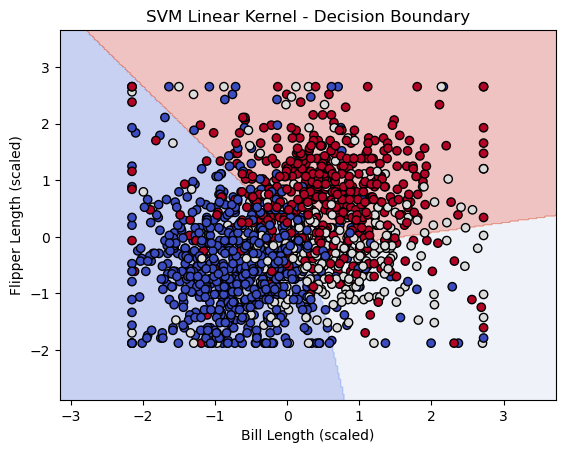

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Select 2 features for plotting (example: bill_length_mm and flipper_length_mm)
X_plot = df_label[["bill_length_mm", "flipper_length_mm"]].values
y_plot = df_label["Species_n"].values

# Scale features (important for SVM)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_plot)

# Train SVM again with only 2 features
clf = SVC(kernel="linear")
clf.fit(X_scaled, y_plot)

# Create meshgrid for background decision regions
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Predict on meshgrid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries + data points
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_plot, cmap=plt.cm.coolwarm, edgecolors="k")
plt.xlabel("Bill Length (scaled)")
plt.ylabel("Flipper Length (scaled)")
plt.title("SVM Linear Kernel - Decision Boundary")
plt.show()
